In [81]:
from model import *
from dataset_final import *
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted s

i: 1


/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


i: 2


/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


i: 3


/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


i: 4


/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


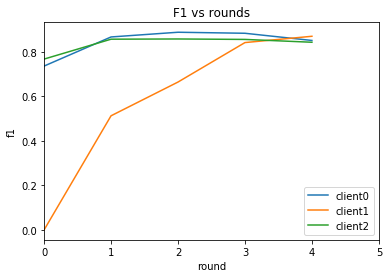

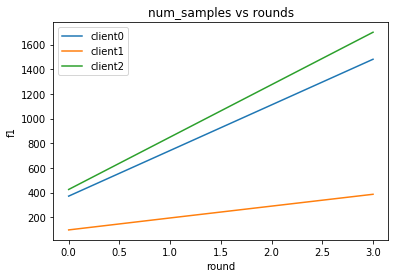

In [83]:
# Generate Data
n_clients = 3
n_rounds = 5
d = Dataset("../data/spam.csv", 0.2, 3, 5)
d.train_test_split()
test_data = pd.DataFrame({'v1': d.X_test, 'v2': d.y_test})
test_data.to_csv('data/test.csv')
d.client_split()
d.train_step_split()
d.write_data_to_file()

test_x, test_y = get_data('./data/test.csv')

def evaluate(model_i):
    return {
                'f1': f1_score(test_y, model_i.predict(test_x)),
                'roc': roc_auc_score(test_y, model_i.predict_proba(test_x))
    }

def compare(_models):
    result = {}
    for i, model in enumerate(_models):
        result[i] = evaluate(model)
    return result

# Test weighted average.
_models = []
for i in range(n_clients):
    client_x, client_y = get_round_data('./data/'+str(i), 0)
    model = Model(client_x, client_y)
    _models.append(model)

results = [compare(_models)]
num_samples = []
for i in range(1, n_rounds):
    print('i: {}'.format(i))
    weights = [i.get_weights() for i in _models]
    n_samples = [i.x_text.shape[0] for i in _models]
    num_samples.append(n_samples)
    average_w = Model.compute_weighted_average(weights, n_samples)
    for j in range(n_clients):
        _models[j].update_weights_average(average_w)
        client_x, client_y = get_round_data('./data/'+str(j), i)
        _models[j].train(client_x, client_y)
    results.append(compare(_models))

    
x = list(range(len(results)))
ax = plt.axes()
for i in range(n_clients):
    y = [item[i]['f1'] for item in results]
    ax.plot(x, y, label='client'+str(i))
ax.set(xlabel='round', ylabel='f1',xlim=(0, n_rounds),
       title='F1 vs rounds');
ax.legend()
plt.show()

x = list(range(len(num_samples)))
ax = plt.axes()
for i in range(n_clients):
    n = [item[i] for item in num_samples]
    ax.plot(x, n, label='client'+str(i))
ax.set(xlabel='round', ylabel='N',
       title='num_samples vs rounds');
ax.legend()

In [88]:
# Generate Data
n_clients = 5
n_rounds = 8
d = Dataset("../data/spam.csv", 0.2, 5, 2)
d.train_test_split()
test_data = pd.DataFrame({'v1': d.X_test, 'v2': d.y_test})
test_data.to_csv('data/test.csv')
d.client_split()
d.train_step_split()
d.write_data_to_file()

test_x, test_y = get_data('./data/test.csv')

def evaluate(model_i):
    return {
                'f1': f1_score(test_y, model_i.predict(test_x)),
                'roc': roc_auc_score(test_y, model_i.predict_proba(test_x))
    }

def compare(_models):
    result = {}
    for i, model in enumerate(_models):
        result[i] = evaluate(model)
    return result

# Test weighted average.
_models = []
for i in range(n_clients):
    client_x, client_y = get_round_data('./data/'+str(i), 0)
    model = Model(client_x, client_y)
    _models.append(model)

results = [compare(_models)]
num_samples = []
for i in range(1, n_rounds):
    print('i: {}'.format(i))
    weights = [i.get_weights() for i in _models]
    n_samples = [i.x_text.shape[0] for i in _models]
    num_samples.append(n_samples)
    average_w = Model.compute_weighted_average(weights, n_samples)
    for j in range(n_clients):
        _models[j].update_weights_average(average_w)
        client_x, client_y = get_round_data('./data/'+str(j), i)
        _models[j].train(client_x, client_y)
    results.append(compare(_models))

    
x = list(range(len(results)))
ax = plt.axes()
for i in range(n_clients):
    y = [item[i]['f1'] for item in results]
    ax.plot(x, y, label='client'+str(i))
ax.set(xlabel='round', ylabel='f1',xlim=(0, n_rounds),
       title='F1 vs rounds');
ax.legend()
plt.show()

x = list(range(len(num_samples)))
ax = plt.axes()
for i in range(n_clients):
    n = [item[i] for item in num_samples]
    ax.plot(x, n, label='client'+str(i))
ax.set(xlabel='round', ylabel='N',
       title='num_samples vs rounds');
ax.legend()

/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float

i: 1


/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float

i: 2


/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float

i: 3


/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


FileNotFoundError: File b'./data/3/3.csv' does not exist

/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


i: 1


/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


i: 2


/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


i: 3


/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


i: 4


/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


i: 5


/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


i: 6


/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


i: 7


/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
/opt/anaconda3/envs/cps/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1547: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


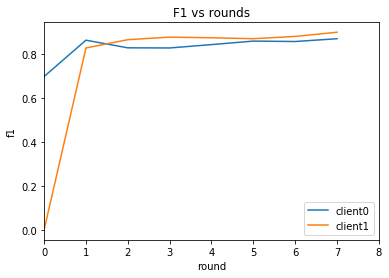

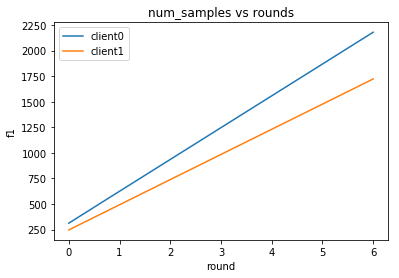

In [87]:
# Generate Data
n_clients = 2
n_rounds = 8
d = Dataset("../data/spam.csv", 0.2, 2, 8)
d.train_test_split()
test_data = pd.DataFrame({'v1': d.X_test, 'v2': d.y_test})
test_data.to_csv('data/test.csv')
d.client_split()
d.train_step_split()
d.write_data_to_file()

test_x, test_y = get_data('./data/test.csv')

def evaluate(model_i):
    return {
                'f1': f1_score(test_y, model_i.predict(test_x)),
                'roc': roc_auc_score(test_y, model_i.predict_proba(test_x))
    }

def compare(_models):
    result = {}
    for i, model in enumerate(_models):
        result[i] = evaluate(model)
    return result

# Test weighted average.
_models = []
for i in range(n_clients):
    client_x, client_y = get_round_data('./data/'+str(i), 0)
    model = Model(client_x, client_y)
    _models.append(model)

results = [compare(_models)]
num_samples = []
for i in range(1, n_rounds):
    print('i: {}'.format(i))
    weights = [i.get_weights() for i in _models]
    n_samples = [i.x_text.shape[0] for i in _models]
    num_samples.append(n_samples)
    average_w = Model.compute_weighted_average(weights, n_samples)
    for j in range(n_clients):
        _models[j].update_weights_average(average_w)
        client_x, client_y = get_round_data('./data/'+str(j), i)
        _models[j].train(client_x, client_y)
    results.append(compare(_models))

    
x = list(range(len(results)))
ax = plt.axes()
for i in range(n_clients):
    y = [item[i]['f1'] for item in results]
    ax.plot(x, y, label='client'+str(i))
ax.set(xlabel='round', ylabel='f1',xlim=(0, n_rounds),
       title='F1 vs rounds');
ax.legend()
plt.show()

x = list(range(len(num_samples)))
ax = plt.axes()
for i in range(n_clients):
    n = [item[i] for item in num_samples]
    ax.plot(x, n, label='client'+str(i))
ax.set(xlabel='round', ylabel='N',
       title='num_samples vs rounds');
ax.legend()